In [73]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [13]:
x,y = load_diabetes(return_X_y=True)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train[0:5]

array([[ 0.07076875,  0.05068012,  0.01211685,  0.05630106,  0.03420581,
         0.04941617, -0.03971921,  0.03430886,  0.02736771, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, -0.03321358, -0.0208323 ,
         0.01215151, -0.07285395,  0.07120998,  0.00027149,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027,  0.09761551, -0.01532849,
        -0.016345  , -0.00658447, -0.00259226,  0.01703713, -0.01350402],
       [-0.02730979, -0.04464164, -0.03530688, -0.02977071, -0.05660707,
        -0.05862005,  0.03023191, -0.03949338, -0.04986847, -0.12948301],
       [-0.02367725, -0.04464164, -0.06548562, -0.08141377, -0.03871969,
        -0.05360967,  0.05968501, -0.0763945 , -0.03712835, -0.04249877]])

In [92]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x_train,y_train):
        #init your coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1]) #initialize coeffs with array of ones.No. of coeffs = no. of columns
        intercept_per_row = []
        slope_intercept = []
        for i in range(self.epochs):
            for j in range(x_train.shape[0]): #no of rows
                idx = np.random.randint(low=0,high=x_train.shape[0])  #generate random integer to choose random row for calculating gradient
                y_hat = np.dot(x_train[idx],self.coef_) + self.intercept_  #single scalar not matrix
                #update intercept for one row
                der_intercept = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * der_intercept)
                slope_intercept.append(der_intercept)
                #update coeff
                der_coeffs = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * der_coeffs)
                intercept_per_row.append(self.intercept_)
        
        plt.plot(intercept_per_row,slope_intercept)
        plt.xlabel('intercept')
        plt.ylabel('Cost/Loss function')
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_
        

In [99]:
model = SGDRegressor(learning_rate=0.01,epochs=35)

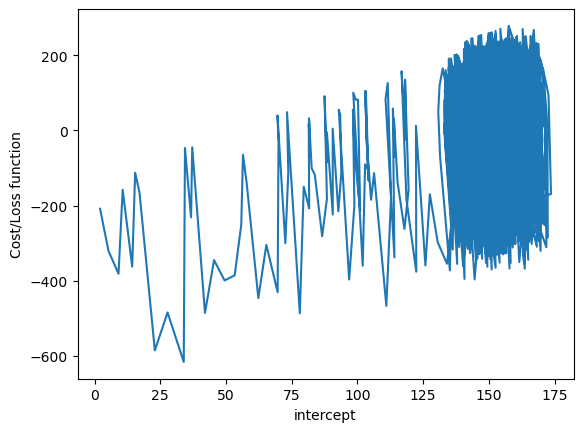

In [100]:
model.fit(x_train,y_train)

In [67]:
y_pred = model.predict(x_test)

In [68]:
model.coef_ #coefs change every time you run the code as rows are selected randomly

array([  54.82436193,  -58.31129365,  304.29319534,  217.88932791,
         19.14936618,  -13.78659554, -151.77682677,  135.96815173,
        247.71393251,  135.574406  ])

In [101]:
model.intercept_

154.01882432553523

In [102]:
from sklearn.linear_model import SGDRegressor

In [108]:
reg = SGDRegressor(max_iter=100,eta0=0.01,learning_rate='constant',early_stopping=False,tol=0.001)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

C:\Users\arsal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.4468042832274225